# Real-world Data Wrangling

# 1. Gather data

### **1.1.** Problem Statement

The COVID-19 pandemic resulted in horrific mortality rates in the United States. However, not all states, regions, and racial groups suffered equally. My purpose in this analysis is to wrangle U.S government health data to investigate the following two questions:

1) Do COVID death rates when compared to number of COVID cases differ to a large degree between various U.S. states? My criteria will be if a state's death rate is 2 times that of the state with the lowest death rate.  

2) Do COVID death rates when compared to number of COVID cases differ to a large degree between Caucasian and African/Black Americans? My criteria will be if a racial group's death rate is 2 times that of the racial group with the lowest death rate.

If COVID cases per death differences exist either geographically or racially, state practices can be explored to mount a more effective public health response in the future. Both datasets are from The COVID tracking project. The first is a general summary of the entire nation broken down by state and testing metrics. The second dataset of the same timeframe breaks down various metrics into numerous racial groups. 

In [1]:
# Importation of packages of interest
import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2. Data Wrangling


### **Dataset 1**

Type: CSV File

Method: Programmatically downloading files

Dataset variables:

* date: Date of record
* state: State of record
* death: all deaths to date suspected to be COVID
* deathConfirmed: death confirmed to be COVID
* deathIncrease: deaths since last recorded date
* deathProbable: Probably COVID deaths
* hospitalized: total hospitalized	
* hospitalizedCumulative: Total number of individuals who have ever been hospitalized with COVID-19.	
* hospitalizedCurrently: Individuals who are currently hospitalized with COVID-19. 	
* hospitalizedIncrease: increase in hospitalizations since last recorded date
* inIcuCumulative: Total number of individuals who have ever been hospitalized in the Intensive Care Unit with COVID-19.
* inIcuCurrently: in ICU as of date	
* negative: Total number of unique people with a completed PCR test that returns negative.	
* negativeIncrease: increase in negative tests	
* negativeTestsAntibody: The total number of completed antibody tests that return negative as reported by the state or territory.
* negativeTestsPeopleAntibody: The total number of unique people with completed antibody tests that return negative as reported by the state or territory.	
* negativeTestsViral: Total number of completed PCR tests (or specimens tested) that return negative as reported by the state or territory.
* onVentilatorCumulative: Total number of individuals who have ever been hospitalized under advanced ventilation with COVID-19.	
* onVentilatorCurrently: Individuals who are currently hospitalized under advanced ventilation with COVID-19. 	
* positive: Total number of confirmed plus probable cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition.	
* positiveCasesViral: Total number of unique people with a positive PCR or other approved nucleic acid amplification test (NAAT), as reported by the state or territory. 	
* positiveIncrease: The daily increase in API field positive, which measures Cases (confirmed plus probable) calculated based on the previous day’s value.		
* positiveTestsAntibody: Total number of completed antibody tests that return positive as reported by the state or territory.	
* positiveTestsAntigen: Total number of completed antigen tests that return positive as reported by the state or territory.	
* positiveTestsPeopleAntibody: The total number of unique people with completed antibody tests that return positive as reported by the state or territory.	
* positiveTestsPeopleAntigen: Total number of unique people with a completed antigen test that returned positive as reported by the state or territory.	
* positiveTestsViral: Total number of completed PCR tests (or specimens tested) that return positive	
* recovered	
* totalTestEncountersViral: Total number of people tested per day via PCR testing as reported by the state or territory.	
* totalTestEncountersViralIncrease: Increase in people tested via PCR testing since last month	
* totalTestResults: Total estimate of US viral (PCR) testing	
* totalTestResultsIncrease:  Total increase in estimate of US viral (PCR) testing since last month.	
* totalTestsAntibody: Total number of completed antibody tests as reported by the state or territory.	
* totalTestsAntigen: Total number of completed antigen tests, as reported by the state or territory.
* totalTestsPeopleAntibody: The total number of unique people who have been tested at least once via antibody testing as reported by the state or territory.	
* totalTestsPeopleAntigen: Total number of unique people who have been tested at least once via antigen testing, as reported by the state or territory.	
* totalTestsPeopleViral: Total number of unique people tested at least once via PCR testing	
* totalTestsPeopleViralIncrease: Increase in total unique people tested since last month	
* totalTestsViral: Total number of PCR tests (or specimens tested) as reported by the state or territory. 	
* totalTestsViralIncrease: Increase in total viral tests since last month

In [2]:
# Generate directory if it does not exist
folder_name = 'udacity_data_wrangling'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# URL of interest saved as variable
url = "https://covidtracking.com/data/download/all-states-history.csv"

In [4]:
# Create an HTTP GET request for data
response = requests.get(url)

In [5]:
# Raise an exception if request results in an error
response.raise_for_status()

In [6]:
# Define the filepath using folder_name and last portion of url
file_path = os.path.join(folder_name, url.split('/')[-1])
print(file_path)

udacity_data_wrangling/all-states-history.csv


In [7]:
# Write in binary  
with open(file_path, mode = 'wb') as file:
        file.write(response.content)

In [8]:
# load csv into pandas dataframe
covid_1_raw = pd.read_csv("/Users/christopherbond/Udacity_Project/udacity_data_wrangling/all-states-history.csv")

### Dataset 2

Type: CSV file

Method: The data was manually downloaded to the local machine and then extracted from there.

Dataset variables:

* Date: Date of record
* State: State of record
* Cases_Total: Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition.
* Cases_White:Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals identifying as Caucasian. 
* Cases_Black:Total number of confirmedvcases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals identifying as African/Black American. 
* Cases_Latinx: Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals identifying as LatinX. 
* Cases_Asian:Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals identifying as Asian.  
* Cases_AIAN:Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals identifying as American Indian or Alaska Native alone.
* Cases_NHPI:Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals identifying as Native Hawaiian and Pacific Islander alone.
* Cases_Multiracial: Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals identifying as two or more races.
* Cases_Other: Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals identifying as some other race alone.
* Cases_Unknown: Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals who did not divulge their race or their race is unknown.
* Cases_Ethnicity_Hispanic: Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals who identified their ethnicity as Hispanic. 
* Cases_Ethnicity_NonHispanic: Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals who identified their ethnicity as Non-Hispanic. 
* Cases_Ethnicity_Unknown: Total number of confirmed cases of COVID-19 reported by the state or territory, ideally per the August 5, 2020 CSTE case definition in individuals who identified their ethnicity as unknown. 
* Deaths_Total: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC).
* Deaths_White: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified as Caucasian.
* Deaths_Black: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified as African or Black American.
* Deaths_Latinx: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified as LatinX.
* Deaths_Asian: : Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified as Asian.
* Deaths_AIAN: : Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified as American Indian or Alaskan Native.
* Deaths_NHPITotal fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified as Native Hawaiian or Pacific Islander.
* Deaths_Multiracial: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified as two or more races.
* Deaths_Other: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified as other race alone. 
* Deaths_Unknown: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who did not divulge their race or their race is unknown.
* Deaths_Ethnicity_Hispanic: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified their ethnicity as Hispanic.
* Deaths_Ethnicity_NonHispanic: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who identified their ethnicity as Non-Hispanic.
* Deaths_Ethnicity_Unknown: Total fatalities with confirmed COVID-19 case diagnosis (per the expanded CSTE case definition of April 5th, 2020 approved by the CDC in individuals who did not divulge their ethnicity or identified their ethnicity as unknown. 
* Hosp_Total: Total number of individuals who have ever been hospitalized with COVID-19.
* Hosp_White: Total number of individuals who have ever been hospitalized with COVID-19 who identified as Caucasian. 
* Hosp_Black: Total number of individuals who have ever been hospitalized with COVID-19 who identified as African or Black American.
* Hosp_Latinx: Total number of individuals who have ever been hospitalized with COVID-19 who identified as LatinX. 
* Hosp_Asian: Total number of individuals who have ever been hospitalized with COVID-19 who identified as Asian. 
* Hosp_AIAN: Total number of individuals who have ever been hospitalized with COVID-19 who identified as American Indian or Alaska Native alone. 
* Hosp_NHPI: Total number of individuals who have ever been hospitalized with COVID-19 who identified as Native Hawaiian and Pacific Islander alone.
* Hosp_Multiracial: Total number of individuals who have ever been hospitalized with COVID-19 who identified as two or more races. 
* Hosp_Other: Total number of individuals who have ever been hospitalized with COVID-19 who identified as some other race alone.
* Hosp_Unknown: Total number of individuals who have ever been hospitalized with COVID-19 who did not divulge their race or their race is unknown.
* Hosp_Ethnicity_Hispanic: Total number of individuals who have ever been hospitalized with COVID-19 who identified their ethnicity as Hispanic.
* Hosp_Ethnicity_NonHispanic: Total number of individuals who have ever been hospitalized with COVID-19 who identified their ethnicity as Non-Hispanic.
* Hosp_Ethnicity_Unknown:: Total number of individuals who have ever been hospitalized with COVID-19 who did not divulge their ethnicity or identified their ethnicity as unknown.
* Tests_Total: Total number of tests for COVID-19. 
* Tests_White: Total number of tests for COVID-19 in individuals who identified as Caucasian. 
* Tests_Black: Total number of tests for COVID-19 in individuals who identified as African or Black American.
* Tests_Latinx: Total number of tests for COVID-19 in individuals who identified as LatinX.
* Tests_Asian: Total number of tests for COVID-19 in individuals who identified as Asian.
* Tests_AIAN: Total number of tests for COVID-19 in individuals who identified as American Indian or Alaskan Native.
* Tests_NHPI: Total number of tests for COVID-19 in individuals who identified as Native Hawaiian or Pacific Islander.
* Tests_Multiracial: Total number of tests for COVID-19 in individuals who identified as two or more races.. 
* Tests_Other: Total number of tests for COVID-19 in individuals who identified as other race alone.
* Tests_Unknown: Total number of tests for COVID-19 in individuals who did not divulge their race or their race is unknown.
* Tests_Ethnicity_Hispanic: Total number of tests for COVID-19 for individuals who identified their ethnicity as Hispanic.
* Tests_Ethnicity_NonHispanic: Total number of tests for COVID-19: Total number of tests for COVID-19 for individuals who identified their ethnicity as Non-Hispanic.
* Tests_Ethnicity_Unknown: Total number of tests for COVID-19 for individuals who did not divulge their ethnicity or identified their ethnicity as unknown.

In [9]:
# load csv into pandas dataframe
covid_2_raw = pd.read_csv("/Users/christopherbond/Udacity_Project/udacity_data_wrangling/CRDT Data - CRDT.csv")

### Data Storage

In [10]:
covid_1_raw.to_csv("/Users/christopherbond/Udacity_Project/udacity_data_wrangling/Raw_data/covid_1_raw.csv", index=False, encoding="utf-8")
covid_2_raw.to_csv("/Users/christopherbond/Udacity_Project/udacity_data_wrangling/Raw_data/covid_2_raw.csv", index=False, encoding="utf-8")

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: For covid_1 and covid_2 dataframes, American Samoa contains little to no data.

In [11]:
# Exploring the data visually using .head()...index 3 is either 0 or N/A
covid_1_raw.head(5)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


In [12]:
# Covid_1_raw has 20780 rows.
covid_1_raw.shape

(20780, 41)

In [13]:
# Exploring the data visually using .head()...index 3 is either 0 or N/A
covid_2_raw.head(5)

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210307,AK,59332.0,18300.0,1499.0,NaN,2447.0,12238.0,1508.0,4453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210307,AZ,826454.0,308453.0,25775.0,244539.0,11921.0,40707.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I wanted to see if this lack of data was a one day issue or an ongoing issue. It appears to be an American Samoa issue. 

In [14]:
# Filtered dataset for only rows containing American Samoa
american_samoa_1 = covid_1_raw[covid_1_raw["state"] == "AS"]
american_samoa_1.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
59,2021-03-06,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
115,2021-03-05,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
171,2021-03-04,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
227,2021-03-03,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0


In [15]:
# Filtered dataset for only rows containing American Samoa
american_samoa_2 = covid_2_raw[covid_2_raw["State"] == "AS"]
american_samoa_2.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,20210303,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,20210228,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,20210224,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,20210221,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Programatic exploration shows few non null values for entire dataframe.

In [16]:
# Exploring the data programtically using .info()
american_samoa_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 3 to 19939
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              357 non-null    object 
 1   state                             357 non-null    object 
 2   death                             355 non-null    float64
 3   deathConfirmed                    0 non-null      float64
 4   deathIncrease                     357 non-null    int64  
 5   deathProbable                     0 non-null      float64
 6   hospitalized                      0 non-null      float64
 7   hospitalizedCumulative            0 non-null      float64
 8   hospitalizedCurrently             0 non-null      float64
 9   hospitalizedIncrease              357 non-null    int64  
 10  inIcuCumulative                   0 non-null      float64
 11  inIcuCurrently                    0 non-null      float64
 12  negative   

In [17]:
# Exploring the data programtically using .info()
american_samoa_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 3 to 5267
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          95 non-null     int64  
 1   State                         95 non-null     object 
 2   Cases_Total                   0 non-null      float64
 3   Cases_White                   0 non-null      float64
 4   Cases_Black                   0 non-null      float64
 5   Cases_Latinx                  0 non-null      float64
 6   Cases_Asian                   0 non-null      float64
 7   Cases_AIAN                    0 non-null      float64
 8   Cases_NHPI                    0 non-null      float64
 9   Cases_Multiracial             0 non-null      float64
 10  Cases_Other                   0 non-null      float64
 11  Cases_Unknown                 0 non-null      float64
 12  Cases_Ethnicity_Hispanic      0 non-null      float64
 13  Cases_Ethn

### Issue and justification: Due to the large amount of missing racial data for American Samoa, its inclusion would not be benficial for my analysis. 

### Quality Issue 2: # "Hospitalized" and "hospitalizedCumulative" columns appear to contain identical values. 

In [18]:
# Explore data visually using .head()
covid_1_raw.head(50)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110
5,2021-03-07,CA,54124.0,NaN,258,NaN,NaN,NaN,4291.0,0,...,49646014.0,133186,NaN,NaN,NaN,NaN,NaN,0,49646014.0,133186
6,2021-03-07,CO,5989.0,5251.0,3,735.0,23904.0,23904.0,326.0,18,...,6415123.0,38163,435053.0,NaN,NaN,NaN,2616541.0,6107,NaN,0
7,2021-03-07,CT,7704.0,6327.0,0,1377.0,NaN,NaN,428.0,0,...,6520366.0,0,NaN,396680.0,NaN,NaN,NaN,0,6520366.0,0
8,2021-03-07,DC,1030.0,NaN,0,NaN,NaN,NaN,150.0,0,...,1261363.0,5726,NaN,NaN,NaN,NaN,441942.0,1149,NaN,0
9,2021-03-07,DE,1473.0,1337.0,9,136.0,NaN,NaN,104.0,0,...,1431942.0,5867,NaN,NaN,NaN,NaN,633424.0,1132,NaN,0


#### "Hospitalized" and "hospitalizedCumulative" columns do not appear in the covid_2_raw dataset so I will focus on covid_1_raw for this issue.

In [19]:
# Explore data visually.  
covid_2_raw.columns

Index(['Date', 'State', 'Cases_Total', 'Cases_White', 'Cases_Black',
       'Cases_Latinx', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI',
       'Cases_Multiracial', 'Cases_Other', 'Cases_Unknown',
       'Cases_Ethnicity_Hispanic', 'Cases_Ethnicity_NonHispanic',
       'Cases_Ethnicity_Unknown', 'Deaths_Total', 'Deaths_White',
       'Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN',
       'Deaths_NHPI', 'Deaths_Multiracial', 'Deaths_Other', 'Deaths_Unknown',
       'Deaths_Ethnicity_Hispanic', 'Deaths_Ethnicity_NonHispanic',
       'Deaths_Ethnicity_Unknown', 'Hosp_Total', 'Hosp_White', 'Hosp_Black',
       'Hosp_Latinx', 'Hosp_Asian', 'Hosp_AIAN', 'Hosp_NHPI',
       'Hosp_Multiracial', 'Hosp_Other', 'Hosp_Unknown',
       'Hosp_Ethnicity_Hispanic', 'Hosp_Ethnicity_NonHispanic',
       'Hosp_Ethnicity_Unknown', 'Tests_Total', 'Tests_White', 'Tests_Black',
       'Tests_Latinx', 'Tests_Asian', 'Tests_AIAN', 'Tests_NHPI',
       'Tests_Multiracial', 'Tests_Other', 'Tests_Un

In [20]:
# Filtered data to see if all values in these two columns are identical. 
duplicated = covid_1_raw[covid_1_raw["hospitalized"] == covid_1_raw["hospitalizedCumulative"]]

# Only 12382 are identical.
duplicated.shape

(12382, 41)

In [21]:
# NA in columns will not filter as duplicates.

# Created copy of covid_1_raw
duplicates = covid_1_raw.copy()

# Converted all NA to 0
duplicates["hospitalized"] = duplicates["hospitalized"].fillna(0)
duplicates["hospitalizedCumulative"] = duplicates["hospitalizedCumulative"].fillna(0)

# Filtered data to see if all values in these two columns are identical.
duplicates = duplicates[duplicates["hospitalized"] == duplicates["hospitalizedCumulative"]]

# The two columns are identical.
duplicates.shape

(20780, 41)

#### Programatic exploration: Used .equals() method to determine the columns are identical.

In [22]:
# Created copy of covid_1_raw
duplicates_2 = covid_1_raw.copy()

# Converted all NA to 0 for entire dataframe
duplicates_2 = duplicates_2.fillna(0)

# Used .equals() to determine if columns were identical
duplicates_2["hospitalized"].equals(duplicates_2["hospitalizedCumulative"])

True

#### Issue and justification: While I do not believe the duplicated colums would impact my analysis, having duplicated data needlessly uses computational and storage resources and also runs the risk of data being entered into the incorrect column. 

### Tidiness Issue 1: We have a consistency issue with variable names being lower case in first letter in raw_1 and upper case in covid_2. 

#### Visual exploration

In [23]:
# Visual exploration using .head()
covid_1_raw.head(5)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


In [24]:
# Visual exploration using .head()
covid_2_raw.head(5)

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210307,AK,59332.0,18300.0,1499.0,NaN,2447.0,12238.0,1508.0,4453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210307,AZ,826454.0,308453.0,25775.0,244539.0,11921.0,40707.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Programamtic exploration using .columns()
covid_1_raw.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [26]:
# Programamtic exploration using .columns()
covid_2_raw.columns

Index(['Date', 'State', 'Cases_Total', 'Cases_White', 'Cases_Black',
       'Cases_Latinx', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI',
       'Cases_Multiracial', 'Cases_Other', 'Cases_Unknown',
       'Cases_Ethnicity_Hispanic', 'Cases_Ethnicity_NonHispanic',
       'Cases_Ethnicity_Unknown', 'Deaths_Total', 'Deaths_White',
       'Deaths_Black', 'Deaths_Latinx', 'Deaths_Asian', 'Deaths_AIAN',
       'Deaths_NHPI', 'Deaths_Multiracial', 'Deaths_Other', 'Deaths_Unknown',
       'Deaths_Ethnicity_Hispanic', 'Deaths_Ethnicity_NonHispanic',
       'Deaths_Ethnicity_Unknown', 'Hosp_Total', 'Hosp_White', 'Hosp_Black',
       'Hosp_Latinx', 'Hosp_Asian', 'Hosp_AIAN', 'Hosp_NHPI',
       'Hosp_Multiracial', 'Hosp_Other', 'Hosp_Unknown',
       'Hosp_Ethnicity_Hispanic', 'Hosp_Ethnicity_NonHispanic',
       'Hosp_Ethnicity_Unknown', 'Tests_Total', 'Tests_White', 'Tests_Black',
       'Tests_Latinx', 'Tests_Asian', 'Tests_AIAN', 'Tests_NHPI',
       'Tests_Multiracial', 'Tests_Other', 'Tests_Un

### Issue and justification: Maintaining consistency in formatting, especially in variable names, is important since Python is case specific. Therefore, I chose to make all variable names lower case. 

### Tidiness Issue 2: The date formats differ between dataframes. 

#### Visual exploration

In [27]:
# Explore data visually via .head()
covid_1_raw.head()[["date"]]

,date
0,2021-03-07
1,2021-03-07
2,2021-03-07
3,2021-03-07
4,2021-03-07


In [28]:
# Explore data visually via .head()
covid_2_raw.head()[["Date"]]

,Date
0,20210307
1,20210307
2,20210307
3,20210307
4,20210307


#### Programtic exploration

In [29]:
#Inspecting the dataframe programmatically
print(covid_1_raw["date"].dtypes)

object


In [30]:
#Inspecting the dataframe programmatically
print(covid_2_raw["Date"].dtypes)

int64


### Issue and justification: In covid_1_raw, the date column is a string object. In covid_2_raw, is in an integer in YYYYMMDD format. I desire to convert both into datetime both for consistency for good practice with dates.  

## 3. Clean data

### Copy raw datasets

In [31]:
# Use .copy() to copy datasets
covid_1_clean = covid_1_raw.copy()
covid_2_clean = covid_2_raw.copy()

### Quality Issue 1: For covid_1 and covid_2 dataframes, American Samoa contains little to no data.

#### Cleaning Method: Filter for AS and obtain index list that can be dropped from dataframe.

In [32]:
# Generate index of rows containing "AS" as a state.
idx_1 = covid_1_clean[covid_1_clean["state"] == "AS"].index

# Drop all indexes (rows) from above which contain "AS" as a state.
covid_1_clean = covid_1_clean.drop(idx_1)

#### Validation: Filter for AS and observe zero records obtained.

In [33]:
#Filter dataset for rows containing "AS" as a state.
samoa_drop = covid_1_clean[covid_1_clean["state"] == "AS"]

#We can see zero rows containing "AS" as a state exist indicating they were removed.  
samoa_drop.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease


#### Cleaning Method: Filter for AS and obtain index list that can be dropped from dataframe.

In [34]:
#Generate index of rows containing "AS" as a state.
idx_2 = covid_2_clean[covid_2_clean["State"] == "AS"].index

#Drop all indexes (rows) from above which contain "AS" as a state.
covid_2_clean = covid_2_clean.drop(idx_2)

#### Validation: Filter for AS and observe zero records obtained.

In [35]:
#Filter dataset for rows containing "AS" as a state.
samoa_drop_2 = covid_2_clean[covid_2_clean["State"] == "AS"]

#We can see zero rows containing "AS" as a state exist indicating they were removed.  
samoa_drop_2.head()

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown


### Justification: American samoa has almost no data present so dropping any pertinent values will have a minimal effect. I also wish to analyze racial data which American Samoa did not obtain so the data will not be helpful. 

### Quality Issue 2: Hospitalized and hospitalizedCumulative columns appear to contain identical values. 

#### Cleaning Method: .drop() method for hospitalized column.

In [36]:
# Used .drop() function to drop the hospitalized column from the database.
covid_1_clean = covid_1_clean.drop(["hospitalized"], axis = 1)

#### Validation Method: Used function to see if column present. 

In [37]:
if "hospitalized" in covid_1_clean.columns:
    print("True")
else:
    print("False")

False


### Justification: Duplicated data is never good practice and certainly not an entire column. This data did not directly impact my area of interest but I still felt its removal was appropriate to free up resources and ensure future data entry did not select the incorrect column. 

### Tidiness Issue 1: We have a consistency issue with variable names being lower case in first letter in raw_1 and upper case in covid_2. 

#### Cleaning Method: Use .columns.str.lower() method to select all columns and make them entirely lowercase. 

In [38]:
# Used .str.lower() method on the covid_1_clean column names. 
covid_1_clean.columns = covid_1_clean.columns.str.lower()

In [39]:
# Used .str.lower() method on the covid_2_clean column names. 
covid_2_clean.columns = covid_2_clean.columns.str.lower()

#### Validation Method: Used .str.islower().all() to determine if all columns are lower case.

In [40]:
#Used .columns.str.islower().all() method
covid_1_clean.columns.str.islower().all()   

True

In [41]:
#Used .columns.str.islower().all() method
covid_2_clean.columns.str.islower().all()   

True

### Justification: Consistent and tidy data can minimize issues with data entry, combining datasets, indexing columns, etc. By having both datasets be in lower case improves the consistency between the two.

### Tidiness Issue 2: The date formats differ between dataframes. 

#### Cleaning Method: Use pd.to_datetime to convert column to datetime. Also used lamba function and string format to convert column in covid_2_clean.

In [42]:
# Use pd.to_datetime to convert column to datatime
covid_1_clean["date"] = pd.to_datetime(covid_1_clean["date"])

In [43]:
# Use lamba function to convert column to datatime and in the proper date format
covid_2_clean['date'] = covid_2_clean['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

#### Validation Method: Used .dtype and head() to programtically and visually determine dtype of formatting. 

In [44]:
# Used .dtype to confirm datetime
covid_1_clean.dtypes[0]

dtype('<M8[ns]')

In [45]:
# Used .dtype to confirm datetime
covid_2_clean.dtypes[0]

dtype('<M8[ns]')

In [46]:
#FILL IN - Validate the cleaning was successful
covid_1_clean.head()[["date"]]

,date
0,2021-03-07
1,2021-03-07
2,2021-03-07
4,2021-03-07
5,2021-03-07


In [47]:
#FILL IN - Validate the cleaning was successful
covid_2_clean.head()[["date"]]

,date
0,2021-03-07
1,2021-03-07
2,2021-03-07
4,2021-03-07
5,2021-03-07


### Justification: Consistent datetimes can be vital for merging databases, consistency, and accurate data.

### Remove unnecessary variables and combine datasets


#### Merged the two clean dataframes covid_1_clean and covid_2_clean using an inner join on the dates and states columns. 

In [48]:
# Merged dataframes on dates and states using inner join.
clean_covid_df = pd.merge(
    left=covid_1_clean, 
    right=covid_2_clean,
    how='inner',
    left_on=["date","state"],
    right_on=["date","state"])

In [49]:
# There are 92 columns in our dataframe
clean_covid_df.shape

(5225, 92)

In [50]:
clean_covid_df = clean_covid_df[["date","state","cases_total","deaths_total",'cases_white','cases_black','deaths_white','deaths_black']]

## 4. Update your data store

In [51]:
covid_1_clean.to_csv("/Users/christopherbond/Udacity_Project/udacity_data_wrangling/Clean_data/covid_1_clean.csv", index=False, encoding="utf-8")
covid_2_clean.to_csv("/Users/christopherbond/Udacity_Project/udacity_data_wrangling/Clean_data/covid_2_clean.csv", index=False, encoding="utf-8")
clean_covid_df.to_csv("/Users/christopherbond/Udacity_Project/udacity_data_wrangling/Clean_data/clean_covid_df.csv", index=False, encoding="utf-8")

## 5. Answer the research question

## Visual 1

### Research question: Do COVID death rates when compared to number of COVID cases differ to a large degree between various U.S. states? My criteria will be if a state's death rate is 2 times that of the state with the lowest death rate.

#### Grouping, feature engineering, and indexing to determine 3 highest and lowest U.S. states or territories for percent of COVID patients who died.

In [52]:
# Case and death totals are cumulative. Grouped by state and aggregated for max values
cases_death_group = clean_covid_df.groupby(by = ["state"], as_index = False).max()[["state","cases_total","deaths_total"]]

# Created new variable %_cases_died from the above grouped data
cases_death_group["%_cases_died"] = (cases_death_group["deaths_total"]/cases_death_group["cases_total"]).mul(100)

# Sorted cases_death_group by %_cases_died and reset index
cases_death_group = cases_death_group.sort_values(by = ["%_cases_died"]).reset_index(drop = True)

# Generated dataframe of top 3 and bottom 3 states for percent of cases who died
idx = [0,1,2,52,53,54]
cases_death_group_df = cases_death_group.iloc[idx]
cases_death_group_df.head(6)

,state,cases_total,deaths_total,%_cases_died
0,AK,59332.0,305.0,0.514056
1,UT,374850.0,1976.0,0.527144
2,VI,2714.0,25.0,0.921150
52,MA,591356.0,16417.0,2.776162
53,NY,1681169.0,48591.0,2.890310
54,NJ,812609.0,23574.0,2.901026


#### Barplot of top 3 and lowest 3 U.S. states or territories for percent of COVID patients who died.

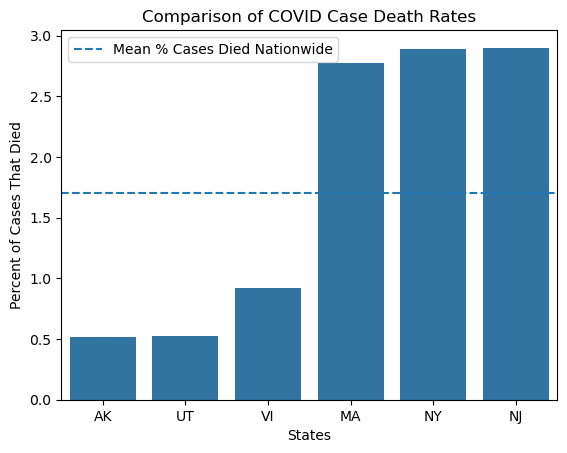

In [53]:
# Average nationwide of percent of cases that died
avg = cases_death_group["%_cases_died"].mean()

# Used tableau blue so bars would be same color.
color = sns.color_palette()[0]

# Barplot of states of interest.
sns.barplot(data = cases_death_group_df, x = "state", y = "%_cases_died", color = color)

# Added mean death rate line for nationwide
plt.axhline(y=avg, color = color, linestyle='--', label='Mean % Cases Died Nationwide')
plt.xlabel("States")
plt.ylabel("Percent of Cases That Died")
plt.title("Comparison of COVID Case Death Rates")
plt.legend();

#### Determination if the maximum state death rate is greater than 2x that of the lowest.

In [54]:
# Boolean expression indicating max death rate is greater than 2x that of the lwoest.
(cases_death_group_df["%_cases_died"].max()/cases_death_group_df["%_cases_died"].min())>=2

True

In [55]:
# Actual calculation of what degree the max death rate is versus the lowest.
cases_death_group_df["%_cases_died"].max()/cases_death_group_df["%_cases_died"].min()

5.643399558866745

### Answer to research question 1: The above visual shows that in MA, NY, and NJ, the percent of COVID cases resulting in death were higher than those of the three lowest states indicating a difference in COVID case mortality rates depending on the state. In the case of NJ (the highest) versus AK (the lowest) the death rate was 5.64x higher. 

## Visual 2

### Research question 2: Do COVID death rates when compared to number of COVID cases differ to a large degree between Caucasian and African/Black Americans? My criteria will be if a racial group's death rate is 2 times that of the racial group with the lowest death rate.

In [56]:
#Created copy of clean_clean_covid_df.copy()
state_death_df = clean_covid_df.copy()

#### Will create a dataframe of only Utah and New Jersey to look at death rates broken down by Caucasian and Black Americans. 

#### Indexing of dataframe for columns of interest.

In [57]:
# Indexed dataframe to remove unneeded columns/variables.
state_death_df = state_death_df[["state",'date','cases_white','cases_black','deaths_white','deaths_black']]

#### Datetime column engineering and new column generation for month and year.

In [58]:
# Used .dt year and month to generate columns of the year and the month alone.
state_death_df['year'] = state_death_df['date'].dt.year
state_death_df['month'] = state_death_df['date'].dt.month

#### Grouped data by state, year, and month. Since data is cumulative, aggregating by max values keeps a running tally of cases over entire timeframe. Sorting by any columns sorts all numerical columns since they're cumulative. 

In [59]:
# Used .groupby to group by state, year, and month columns. Used .max aggregate. 
state_death_group = state_death_df.groupby(by = ["state","year","month"], as_index = False).max()

# Filtered state_death_group for UT and NJ
state_death_group = state_death_group[(state_death_group["state"] == "NJ") | (state_death_group["state"] == "UT")]

# Sorted by state and cases_white (could sort by any numerical column)
state_death_group = state_death_group.sort_values(by = ["state","cases_white"], ascending = False).reset_index(drop = True)

#### There is an issue with cases_black in Utah in January. This is a cumative value. It cannot decrease from January to February.

In [60]:
# Indexed by Utah and date and cases_black feature
value = state_death_df[(state_death_df["state"] == "UT") & (state_death_df["date"] == "2021-01-31")]["cases_black"]
value

597    4634.0
Name: cases_black, dtype: float64

#### Correct value is 4634.0 since this is the cumulative number of cases on Jan 31st the end of the month.

In [61]:
state_death_group.loc[2, 'cases_black'] = 4634.0
state_death_group.head()

,state,year,month,date,cases_white,cases_black,deaths_white,deaths_black
0,UT,2021,3,2021-03-07,238411.0,5001.0,1329.0,18.0
1,UT,2021,2,2021-02-28,237249.0,4976.0,1314.0,18.0
2,UT,2021,1,2021-01-31,218696.0,4634.0,1107.0,17.0
3,UT,2020,12,2020-12-30,164872.0,3764.0,816.0,14.0
4,UT,2020,11,2020-11-29,111340.0,2867.0,537.0,11.0


#### Death and cases are cumulative. I wishes to see month by month differences. So generated new columns with these values.

In [62]:
# Iterated over columns of interest and used .diff() to generate cases and deaths per month versus cumulative.
col_name = ["cases_white","cases_black","deaths_white","deaths_black"]
for col in col_name:
    state_death_group[col + str(" per month")] = -(state_death_group[col].diff())  

#### Drop NAs months from dataframe and dropped June from NJ since no Utah data for this month. 

In [63]:
# Indexed for columns of interest
state_death_group = state_death_group[["state","month", "cases_white per month", "cases_black per month", "deaths_white per month", "deaths_black per month"]]

# Dropped rows containing NAs
state_death_group = state_death_group.dropna()

# Since Utah June dropped due to NAs also did so with NJ June
state_death_group = state_death_group.drop(index = 22)

#### Generated new columns/features of percent of cases resulting in deaths broken down by race. 

In [64]:
# Generation of percent of cases that died columns/variables.
state_death_group["%_cases_died_white"] = (state_death_group["deaths_white per month"]/state_death_group["cases_white per month"]).mul(100)
state_death_group["%_cases_died_black"] = (state_death_group["deaths_black per month"]/state_death_group["cases_black per month"]).mul(100)

# Indexed dataframe for columns of interest
state_death_group = state_death_group[["state","month","%_cases_died_white","%_cases_died_black"]]

# Reset_index
state_death_group.reset_index(drop = True) 
state_death_group

,state,month,%_cases_died_white,%_cases_died_black
1,UT,2,1.290878,-0.000000
2,UT,1,1.115723,0.292398
3,UT,12,0.540651,0.344828
4,UT,11,0.521184,0.334448
5,UT,10,0.385099,0.299700
6,UT,9,0.410125,0.254453
7,UT,8,0.237195,-0.000000
8,UT,7,0.900202,0.865801
9,UT,6,0.681099,-0.000000
13,NJ,2,2.215030,2.420091


#### Lineplots of comparing NJ and UT Caucasian and African American percent of COVID cases resulting in death.

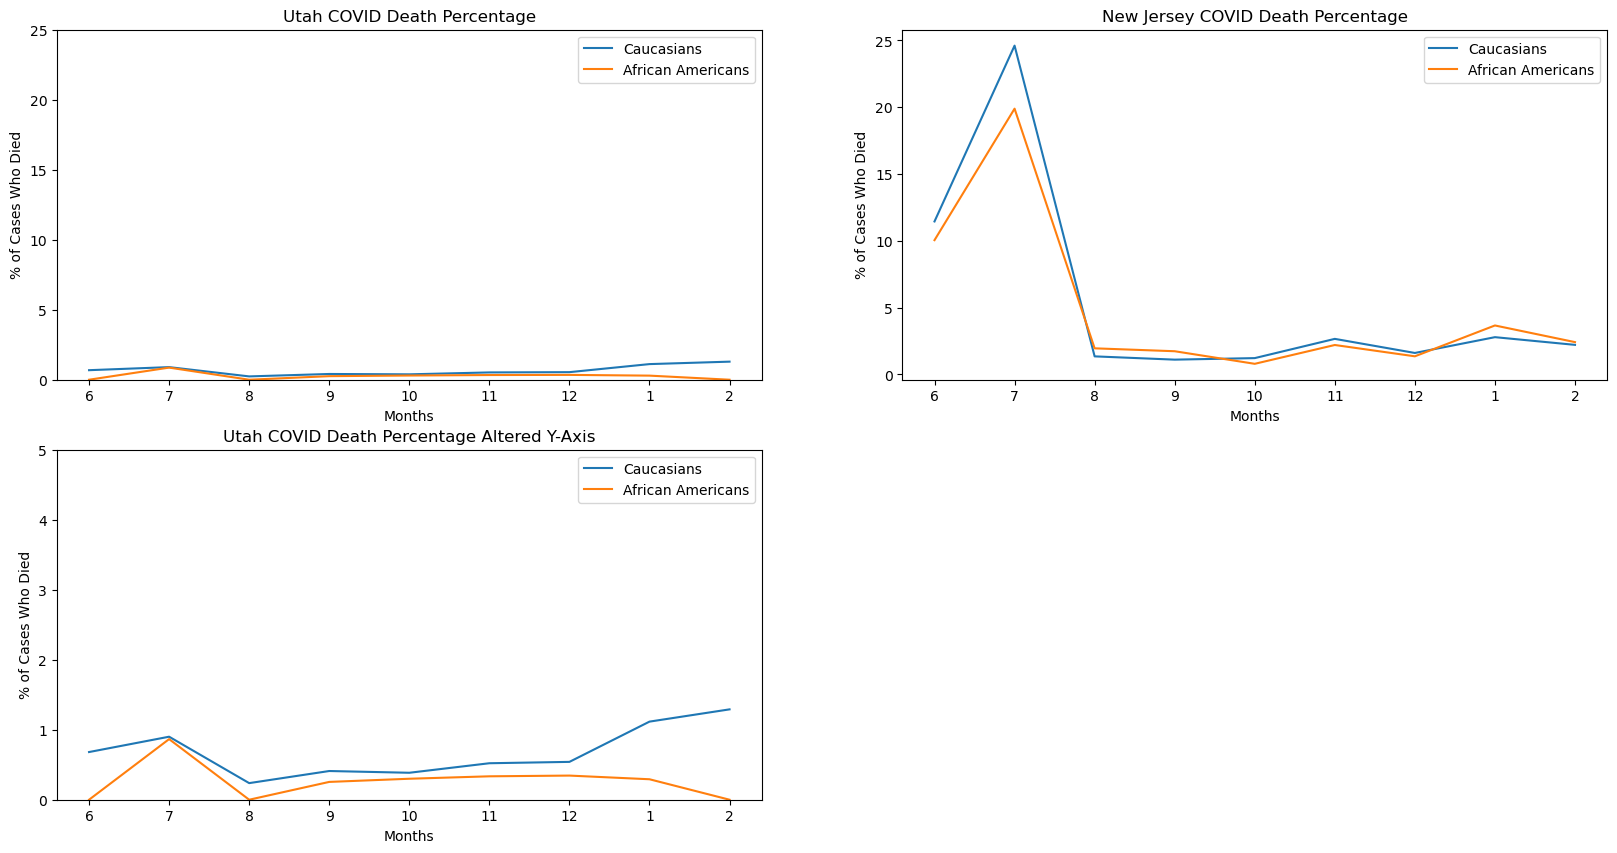

In [65]:
# Create xtick labels. 
x = ["6","7","8","9","10","11","12","1","2"]

# Create variables based on dataframe indices.

# Utah data...used negative indexing since the numerical months would not sort as desired.
a = (state_death_group["%_cases_died_white"][0:9]).iloc[::-1]
b = (state_death_group["%_cases_died_black"][0:9]).iloc[::-1]


# # New Jersey data...used negative indexing since the numerical months would not sort as desired.
c = (state_death_group["%_cases_died_white"][9:19]).iloc[::-1]
d = (state_death_group["%_cases_died_black"][9:19]).iloc[::-1]


plt.figure(figsize = [20,10]) 

# Subplot #1 Utah Line
plt.subplot(2, 2, 1) 
plt.plot(x,a, label = "Caucasians")
plt.plot(x,b, label = "African Americans")
plt.title("Utah COVID Death Percentage")
plt.xlabel("Months")

# Set the y axis identical to that of the NJ data.  
plt.ylim(0,25)
plt.ylabel("% of Cases Who Died")
plt.legend();

# Subplot #2
plt.subplot(2, 2, 2) 
plt.plot(x,c, label = "Caucasians")
plt.plot(x,d, label = "African Americans")
plt.title("New Jersey COVID Death Percentage")
plt.xlabel("Months")
plt.ylabel("% of Cases Who Died")
plt.legend();

# Subplot #3
plt.subplot(2, 2, 3) 
plt.plot(x,a, label = "Caucasians")
plt.plot(x,b, label = "African Americans")
plt.title("Utah COVID Death Percentage Altered Y-Axis")

# Zoomed the y axis to explore potential differences.
plt.ylim(0,5)
plt.xlabel("Months")
plt.ylabel("% of Cases Who Died")
plt.legend();

In [66]:
state_death_group["Percent_difference"] = state_death_group["%_cases_died_white"]/state_death_group["%_cases_died_black"]
state_death_group

,state,month,%_cases_died_white,%_cases_died_black,Percent_difference
1,UT,2,1.290878,-0.000000,-inf
2,UT,1,1.115723,0.292398,3.815771
3,UT,12,0.540651,0.344828,1.567888
4,UT,11,0.521184,0.334448,1.558339
5,UT,10,0.385099,0.299700,1.284949
6,UT,9,0.410125,0.254453,1.611792
7,UT,8,0.237195,-0.000000,-inf
8,UT,7,0.900202,0.865801,1.039733
9,UT,6,0.681099,-0.000000,-inf
13,NJ,2,2.215030,2.420091,0.915267


### Answer to research question 2: The criteria for a difference between racial groups was the highest rate being 2x that of the lowest. We only saw that for a single month in Utah where there were actual African American deaths. 

### **5.2:** Reflection

#### Conclusion Commentary.
* I was not surprised by the differences seen at the state level. It was well known during the pandemic that certain suffered worse than others. I do wonder to what degree population density plays a role in this observation?
* I was a bit surprised that racial differences were minimal. Due to higher percentages of African Americans having chronic illnesses, I thought there would be an increase in the African American death rate. This was not shown to be the case. 

#### Additional Explorations
* I would like to have additional data that explores the demographic makeup of each state broken down by racial educational, income levels, educagtional attainment, etc.
* Using the data I have, I would potentially look into additional racial groups to explore if large differences in COVID deaths rates exist.
* Using the data I have, I would also like to explore how rates of testing at the state level correlate with death rates. This could also expand into looking at testing levels by racial group and then comparing to the racial death rates.
* I'd also like to explore the various types of COVID tests that exist and explore what differences or correlations may exist between those test numbers and death rate ot the state level. 